## Simple Linear Regression
In diesem Notebook wird eine Lineare Regression berechnet, um den Preis anhand der Wohnfläche in m2 vorherzusagen.
Um ein genaueres Modell zu erhalten, wurden die Immobilien in Ihre verschiedenen Typen unterteilt.
War das Modell weiterhin ungenau wurden weitere unterscheidungen getroffen.

In [46]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import seaborn as sns
 

### Dataframe einlesen und nach Kategorien sortieren

In [47]:
#Load cleaned Dataframe
df = pd.read_csv('../data/clean/immoscout.csv')
df.head(5)

,ForestDensityM,Latitude,Longitude,NoisePollutionRailwayM,NoisePollutionRoadM,PopulationDensityM,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_agriculture_percentage,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,0.286451,47.415927,8.085840,0.0,0.067048,0.209530,0.001811,0.011871,3.038467,30.676329,...,1,0,0,0,0,0,0,0,0,0
1,0.286451,47.415927,8.085840,0.0,0.067048,0.209530,0.001811,0.011871,3.038467,30.676329,...,0,0,0,0,0,0,0,0,1,0
2,0.095877,47.397416,8.043150,0.0,0.381257,0.393783,0.188229,0.000000,0.909587,11.354420,...,1,0,0,0,0,0,0,0,0,0
3,0.286451,47.415927,8.085840,0.0,0.067048,0.209530,0.001811,0.011871,3.038467,30.676329,...,0,0,0,0,0,0,0,0,0,0
4,0.279276,47.404870,8.052781,0.0,0.132933,0.136984,0.141473,0.091805,1.460245,33.137090,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#all columns with 'type_' in name
type_cols = [col for col in df.columns if 'type_' in col]

#Dictionnary with all type sorted dataframes
by_type = dict()

for t in type_cols:
    by_type[t] = df[df[t] == 1]

### Funktionen für die Lineare Regression

In [50]:
#Funktion für die Berechnung der Linearen Regression, sowie der Residuenanalyse
def price_livingspace(df):
    #Name muss noch hinzugefügt werden
    y = df['price'].values
    x = df['living_space_m2'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    print('R^2: ', r_2)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression')
    plt.show()
    
    #Residuenanalyse verteilung
    predict= model.predict(x)
    resid = y-predict 
    plt.scatter(x,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung')
    plt.show()
    
    #Verteilung der Residuen
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung')
    plt.show()


In [51]:
#Funktion um den Preis, mit der dazugehörigen Fläche zu plotten
def plot_data(dataframe):
    plt.scatter(dataframe['price'], dataframe['living_space_m2'])
    plt.xlabel('Preis in CHF')
    plt.ylabel('Living Space')
    plt.title('Preis vs Living Space')
    plt.show()

### Untersuchung Lineare Regression ganzer Datensatz

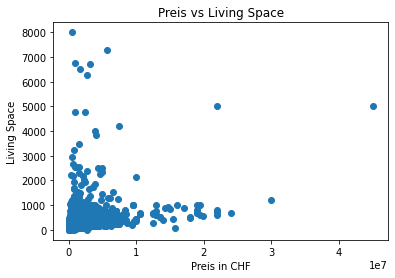

In [52]:
#Plot mit allen Datenpunkten ohne unterteilung der Typen
plot_data(df)

Ohne unterteilung in die verschiedenen Typen ist kein Linearer zusammenhang zwischen Preis und Wohnfläche erkennbar.
Deshalb werden die Daten in Ihre verschiedenen Kategorien unterteilt.

### Lineare Regression in verschiedenen Kategorien

#### Merkmale der Residuenanalyse:
1. Residuen müssen um 0 Verteil sein
2. Residuen müssen gleichmässig verteilt sein
3. Residuen müssen Normalverteilt sein


R^2:  0.3883445971046541


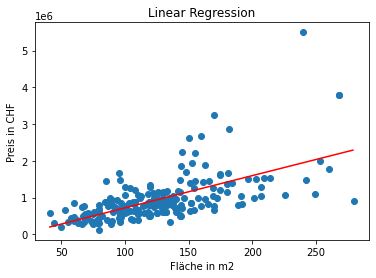

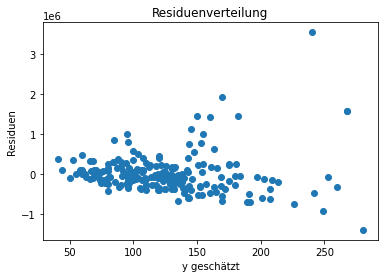

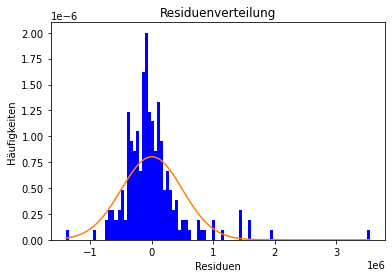

In [53]:
price_livingspace(by_type['type_attic-flat'])

Für die Attikawohnungen erhalten wir schon ein wesentlich aussagekräftigeres Modell.
Sehen jedoch einige ausreisser im oberen Pressigment, welche unser Modell verfälschen.
Mit zunehmender Wohnfläche vergrössert sich die Streuung des Preises.
Hier müsste man allenfalls den Standort genauer untersuchen (Stadtnähe, Stockwerk, etc. verfälschen unser einfaches Modell)

R^2:  1.0


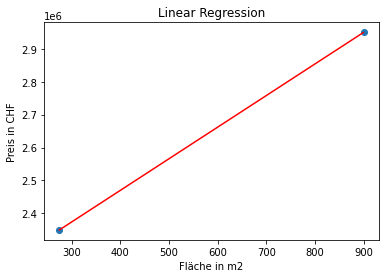

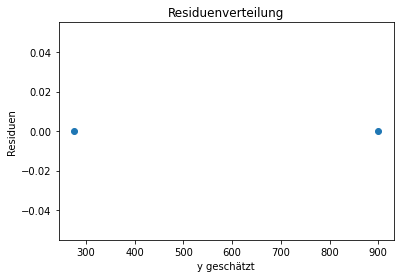

c:\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


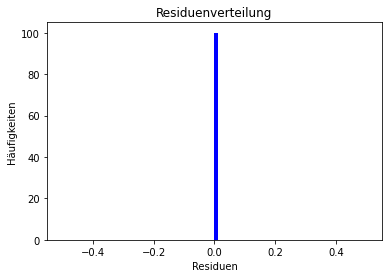

In [54]:
price_livingspace(by_type['type_castle'])

Mit nur 2 Datenpunkten erhalten wir automatisch und immer ein perfektes Modell.
Jedoch ist unser Modell überhaupt nicht aussagekräftig.

R^2:  0.9721659988859433


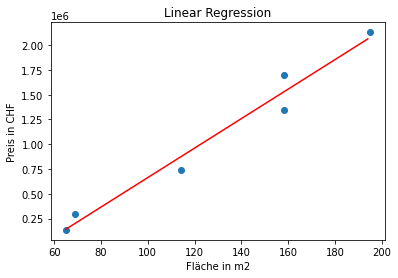

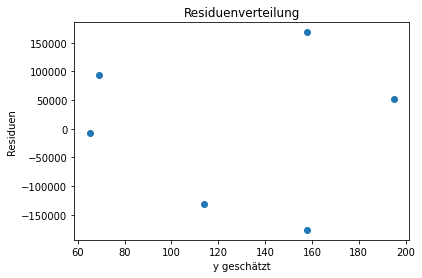

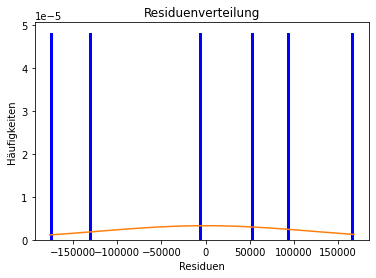

In [55]:
price_livingspace(by_type['type_attic-room'])

Dieses Modell performt mit einem Score von 97% sehr gut, was jedoch auch an den wenigen Datenpunkten geschuldet ist.
Dennoch sehen wir einen schönen Linearen anstieg des Preises.

R^2:  0.12635892699741824


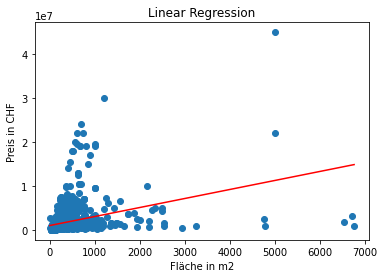

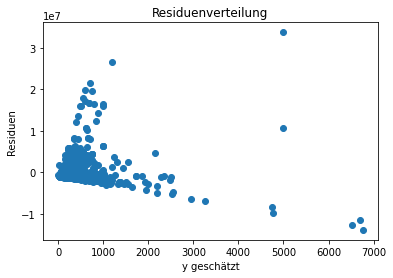

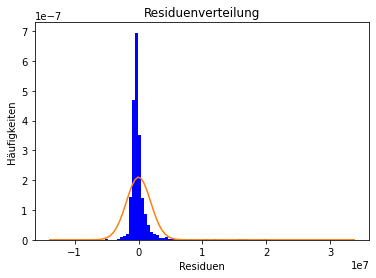

In [56]:
price_livingspace(by_type['type_detached-house'])

Auch hier haben wir wieder das ähnliche Problem wie bei den Chalets.
Es scheint wichtige weitere Einflüsse auf den Preis zu geben, welche in einem guten Vorhersagemodell auch beachtet werden müssen.

R^2:  0.01675856587404201


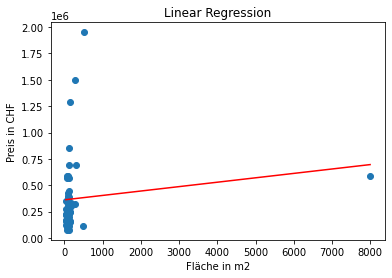

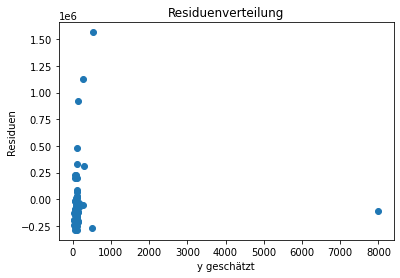

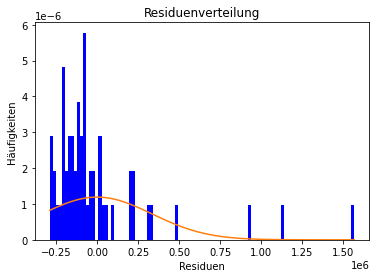

In [57]:
price_livingspace(by_type['type_rustico'])

In diesem Beispiel sehen wir gut wie ein Ausreisser das Modell extrem verfälschen kann.
unten sehen Sie das Modell, in welchem die Ausreisser aussortiert werden.

In [58]:
#delete all rows with living_space_m2 > 1000
df_rustico = by_type['type_rustico']

df_rustico = df_rustico[df_rustico['living_space_m2'] < 1000]

R^2:  0.26715060657003564


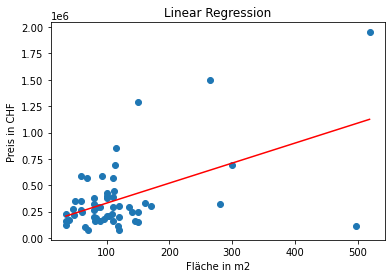

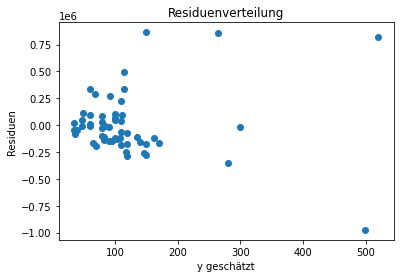

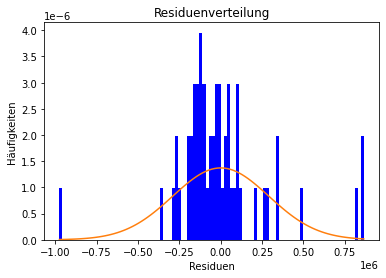

In [59]:
price_livingspace(df_rustico)

Das Modell performt gleich massiv besser.
Wir sehen welch grosse Einflüsse Ausreisser auf unser Modell haben kann.

#### Linear Regression with normalized Data

In [60]:
from sklearn import preprocessing
#Dataframe mit allen Wohnungen
df_rustico = by_type['type_rustico']

# select price and living space from df_rustico and safe in a new dataframe
y,x = df_rustico['price'].values, df_rustico['living_space_m2'].values

#cleaning Data
mask = ~pd.isna(x) & ~pd.isna(y)
x = x[mask].reshape(-1,1)
y = y[mask].reshape(-1,1)

x_normalized = preprocessing.normalize(x, axis=0).reshape(-1,1)

# create new dataframe with y as 'price' and x_normalized as 'living_space_m2'
df_rustico_normalized = pd.DataFrame({'price': y.reshape(-1), 'living_space_m2': x_normalized.reshape(-1)})
df_rustico_normalized.head(5)


,price,living_space_m2
0,585000.0,0.990253
1,395000.0,0.012378
2,295000.0,0.010521
3,165000.0,0.004332
4,570000.0,0.013616


R^2:  0.01675856587404201


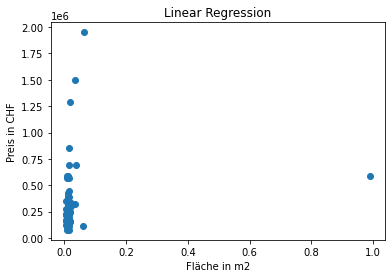

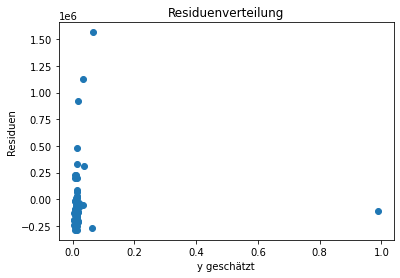

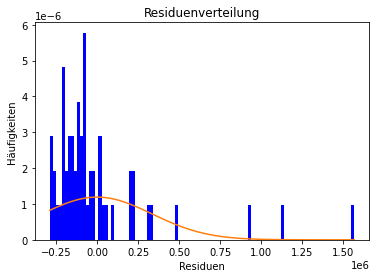

In [61]:
# Linear Regression with Normalized X 
price_livingspace(df_rustico_normalized)

Wie wir sehen nützt uns die Normalisierung bei nur einem Feature nichts, das Modell Performt gleich.
Selber Datensatz wurde auch ohne Ausreisser Normalisiert und führte zu gleichem Resultat.